## Read Data

In [19]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.utils import to_categorical

In [20]:
# Load the dataset
file_path = file_path = '/content/fer2013.csv'
data = pd.read_csv(file_path)

In [21]:
print("\nDataset Info:")
print(data.info())

print("\nMissing Values:")
print(data.isnull().sum())


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35887 entries, 0 to 35886
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   emotion  35887 non-null  int64 
 1   pixels   35887 non-null  object
 2   Usage    35887 non-null  object
dtypes: int64(1), object(2)
memory usage: 841.2+ KB
None

Missing Values:
emotion    0
pixels     0
Usage      0
dtype: int64


In [22]:
# Map emotion labels to their respective names (based on FER2013)
emotion_mapping = {
    0: "Angry",
    1: "Disgust",
    2: "Fear",
    3: "Happy",
    4: "Sad",
    5: "Surprise",
    6: "Neutral"
}

In [23]:
# Preprocessing: Convert pixel strings to numpy arrays
def preprocess_pixels(pixel_string):
    pixel_array = np.array([int(pixel) for pixel in pixel_string.split()])
    return pixel_array.reshape(48, 48, 1)  # Reshape to 48x48 grayscale image

In [24]:
print(data.columns)

Index(['emotion', 'pixels', 'Usage'], dtype='object')


In [25]:
print(data.head())

   emotion                                             pixels     Usage
0        0  70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...  Training
1        0  151 150 147 155 148 133 111 140 170 174 182 15...  Training
2        2  231 212 156 164 174 138 161 173 182 200 106 38...  Training
3        4  24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...  Training
4        6  4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...  Training


In [26]:
# Load the dataset and assign column names
column_names = ["emotion", "pixels", "Usage"]  # FER2013 has these 3 columns
data = pd.read_csv(file_path, names=column_names, skiprows=1)  # Skip the first row if it contains column headers

In [27]:
# Split the data based on Usage column
train_data = data[data["Usage"] == "Training"]
val_data = data[data["Usage"] == "PublicTest"]
test_data = data[data["Usage"] == "PrivateTest"]

In [28]:
def preprocess_pixels(pixel_string):
    pixel_array = np.array([int(pixel) for pixel in pixel_string.split()])
    return pixel_array.reshape(48, 48, 1)  # Reshape to 48x48 grayscale image


In [29]:
# Preprocessing: Convert pixel strings to numpy arrays
def preprocess_pixels(pixel_string):
    pixel_array = np.array([int(pixel) for pixel in pixel_string.split()])
    if pixel_array.size != 2304:  # Validate pixel data size
        raise ValueError(f"Unexpected pixel data size: {pixel_array.size}")
    return pixel_array.reshape(48, 48, 1)  # Reshape to 48x48 grayscale image

# Check for invalid pixel data sizes
valid_pixel_data = data["pixels"].apply(lambda x: len(x.split()) == 2304)
invalid_rows = data[~valid_pixel_data]

if not invalid_rows.empty:
    print("\nInvalid rows with incorrect pixel data sizes:")
    print(invalid_rows)
    # Drop invalid rows (or handle them as needed)
    data = data[valid_pixel_data]

# Apply preprocessing to the dataset
data["pixels"] = data["pixels"].apply(preprocess_pixels)

In [30]:
data["pixels"] = data["pixels"].apply(lambda x: x / 255.0)


In [31]:
# Prepare features and labels for each set
X_train = np.array([x for x in train_data["pixels"].values])  # Already reshaped by preprocess_pixels
X_val = np.array([x for x in val_data["pixels"].values])
X_test = np.array([x for x in test_data["pixels"].values])

y_train = to_categorical(train_data["emotion"].values, num_classes=7)
y_val = to_categorical(val_data["emotion"].values, num_classes=7)
y_test = to_categorical(test_data["emotion"].values, num_classes=7)

In [32]:
print(f"Shape of X_train: {X_train.shape}")
print(f"Shape of first image in X_train: {X_train[0].shape}")

Shape of X_train: (28709,)
Shape of first image in X_train: ()


In [33]:
print("Training set shape:", X_train.shape, y_train.shape)
print("Validation set shape:", X_val.shape, y_val.shape)
print("Test set shape:", X_test.shape, y_test.shape)

Training set shape: (28709,) (28709, 7)
Validation set shape: (3589,) (3589, 7)
Test set shape: (3589,) (3589, 7)


In [34]:
print(data["pixels"].head())

0    [[[0.27450980392156865], [0.3137254901960784],...
1    [[[0.592156862745098], [0.5882352941176471], [...
2    [[[0.9058823529411765], [0.8313725490196079], ...
3    [[[0.09411764705882353], [0.12549019607843137]...
4    [[[0.01568627450980392], [0.0], [0.0], [0.0], ...
Name: pixels, dtype: object


In [35]:
print(type(X_train[0]))
print(X_train[0].shape if isinstance(X_train[0], np.ndarray) else X_train[0])

<class 'numpy.str_'>
70 80 82 72 58 58 60 63 54 58 60 48 89 115 121 119 115 110 98 91 84 84 90 99 110 126 143 153 158 171 169 172 169 165 129 110 113 107 95 79 66 62 56 57 61 52 43 41 65 61 58 57 56 69 75 70 65 56 54 105 146 154 151 151 155 155 150 147 147 148 152 158 164 172 177 182 186 189 188 190 188 180 167 116 95 103 97 77 72 62 55 58 54 56 52 44 50 43 54 64 63 71 68 64 52 66 119 156 161 164 163 164 167 168 170 174 175 176 178 179 183 187 190 195 197 198 197 198 195 191 190 145 86 100 90 65 57 60 54 51 41 49 56 47 38 44 63 55 46 52 54 55 83 138 157 158 165 168 172 171 173 176 179 179 180 182 185 187 189 189 192 197 200 199 196 198 200 198 197 177 91 87 96 58 58 59 51 42 37 41 47 45 37 35 36 30 41 47 59 94 141 159 161 161 164 170 171 172 176 178 179 182 183 183 187 189 192 192 194 195 200 200 199 199 200 201 197 193 111 71 108 69 55 61 51 42 43 56 54 44 24 29 31 45 61 72 100 136 150 159 163 162 163 170 172 171 174 177 177 180 187 186 187 189 192 192 194 195 196 197 199 200 201 200 

#FINAL

Shape of X_train: (28709, 48, 48, 1)
Shape of X_val: (3589, 48, 48, 1)
Shape of X_test: (3589, 48, 48, 1)
Shape of y_train: (28709, 7)
Shape of y_val: (3589, 7)
Shape of y_test: (3589, 7)


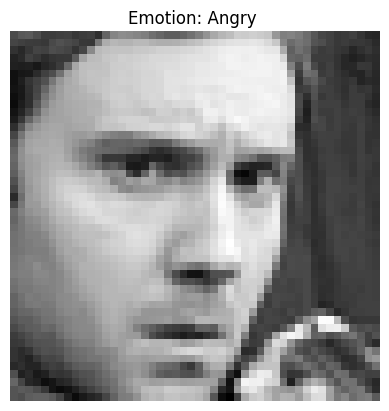

In [36]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

# Load the dataset
file_path = '/content/fer2013.csv'
data = pd.read_csv(file_path)

# Map emotion labels to their respective names (based on FER2013)
emotion_mapping = {
    0: "Angry",
    1: "Disgust",
    2: "Fear",
    3: "Happy",
    4: "Sad",
    5: "Surprise",
    6: "Neutral"
}

# Load the dataset and assign column names
column_names = ["emotion", "pixels", "Usage"]  # FER2013 has these 3 columns
data = pd.read_csv(file_path, names=column_names, skiprows=1)  # Skip the first row if it contains column headers

# Preprocessing: Convert pixel strings to numpy arrays
def preprocess_pixels(pixel_string):
    pixel_array = np.array([int(pixel) for pixel in pixel_string.split()])
    if pixel_array.size != 2304:  # Validate pixel data size
        raise ValueError(f"Unexpected pixel data size: {pixel_array.size}")
    return pixel_array.reshape(48, 48, 1)  # Reshape to 48x48 grayscale image

# Apply preprocessing to the dataset
data["pixels"] = data["pixels"].apply(preprocess_pixels)

# Normalize pixel values to the range [0, 1]
data["pixels"] = data["pixels"].apply(lambda x: x / 255.0)

# Split the data based on Usage column
train_data = data[data["Usage"] == "Training"]
val_data = data[data["Usage"] == "PublicTest"]
test_data = data[data["Usage"] == "PrivateTest"]

# Prepare features and labels for each set
X_train = np.stack(train_data["pixels"].values)  # Stack arrays into a single NumPy array
X_val = np.stack(val_data["pixels"].values)
X_test = np.stack(test_data["pixels"].values)

y_train = to_categorical(train_data["emotion"].values, num_classes=7)
y_val = to_categorical(val_data["emotion"].values, num_classes=7)
y_test = to_categorical(test_data["emotion"].values, num_classes=7)

# Print dataset shapes
print(f"Shape of X_train: {X_train.shape}")
print(f"Shape of X_val: {X_val.shape}")
print(f"Shape of X_test: {X_test.shape}")
print(f"Shape of y_train: {y_train.shape}")
print(f"Shape of y_val: {y_val.shape}")
print(f"Shape of y_test: {y_test.shape}")

# Display a sample image and its label
plt.imshow(X_train[0].reshape(48, 48), cmap="gray")
plt.title(f"Emotion: {emotion_mapping[np.argmax(y_train[0])]} ")
plt.axis("off")
plt.show()

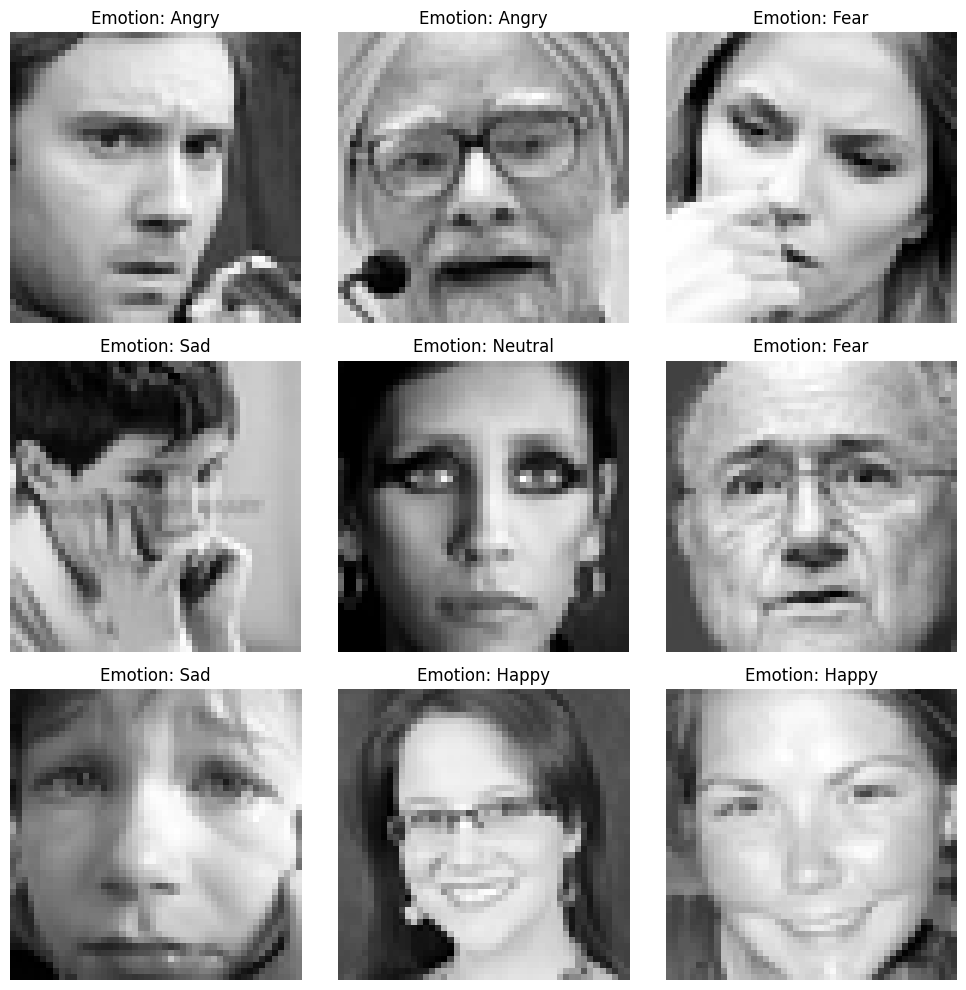

In [37]:
# Display multiple images with their labels
num_images = 9  # Number of images to display
plt.figure(figsize=(10, 10))  # Set the figure size

for i in range(num_images):
    plt.subplot(3, 3, i + 1)  # Create a 3x3 grid
    plt.imshow(X_train[i].reshape(48, 48), cmap="gray")  # Display image
    plt.title(f"Emotion: {emotion_mapping[np.argmax(y_train[i])]}")  # Title with emotion label
    plt.axis("off")  # Turn off axes

plt.tight_layout()  # Adjust spacing between plots
plt.show()

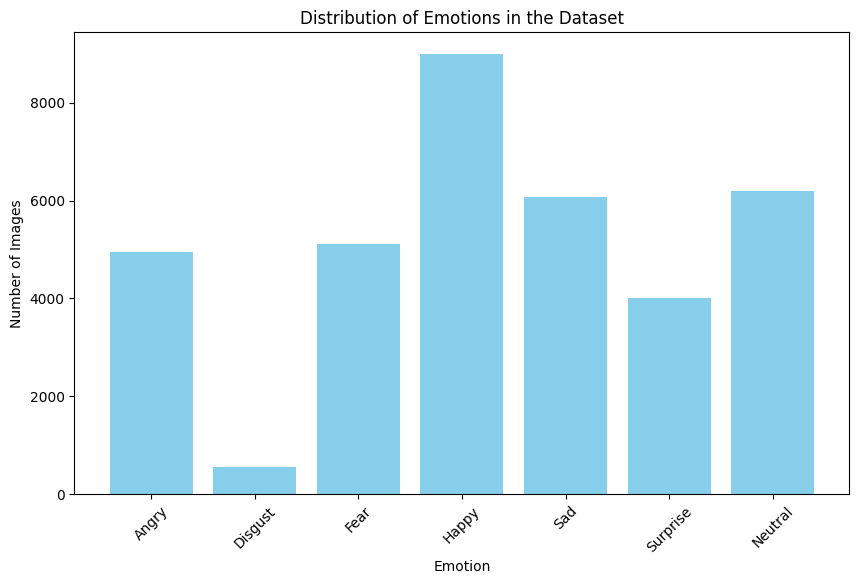

In [38]:
# Plot emotion distribution
emotion_counts = data['emotion'].value_counts().sort_index()  # Count occurrences of each emotion
plt.figure(figsize=(10, 6))
plt.bar(emotion_mapping.values(), emotion_counts, color='skyblue')
plt.xlabel("Emotion")
plt.ylabel("Number of Images")
plt.title("Distribution of Emotions in the Dataset")
plt.xticks(rotation=45)
plt.show()

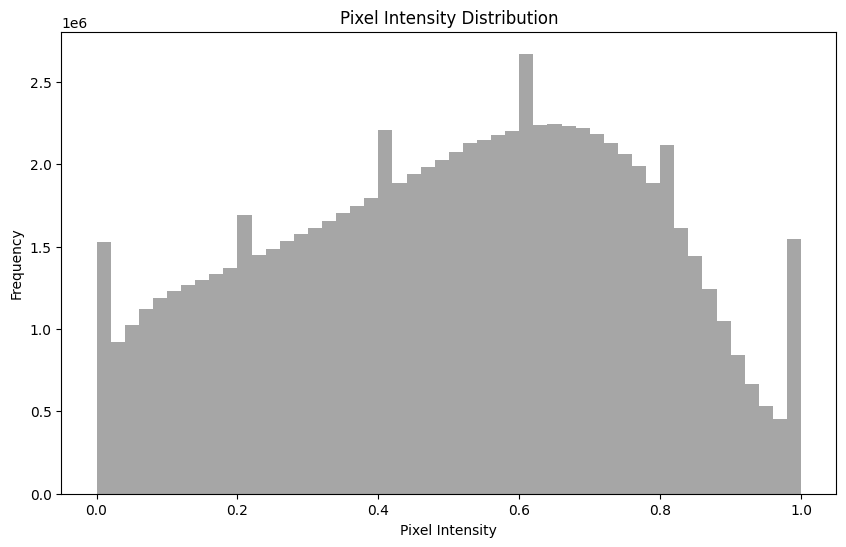

In [39]:
# Flatten all pixel values and plot the histogram
all_pixels = np.concatenate([x.flatten() for x in data["pixels"]])
plt.figure(figsize=(10, 6))
plt.hist(all_pixels, bins=50, color='gray', alpha=0.7)
plt.xlabel("Pixel Intensity")
plt.ylabel("Frequency")
plt.title("Pixel Intensity Distribution")
plt.show()

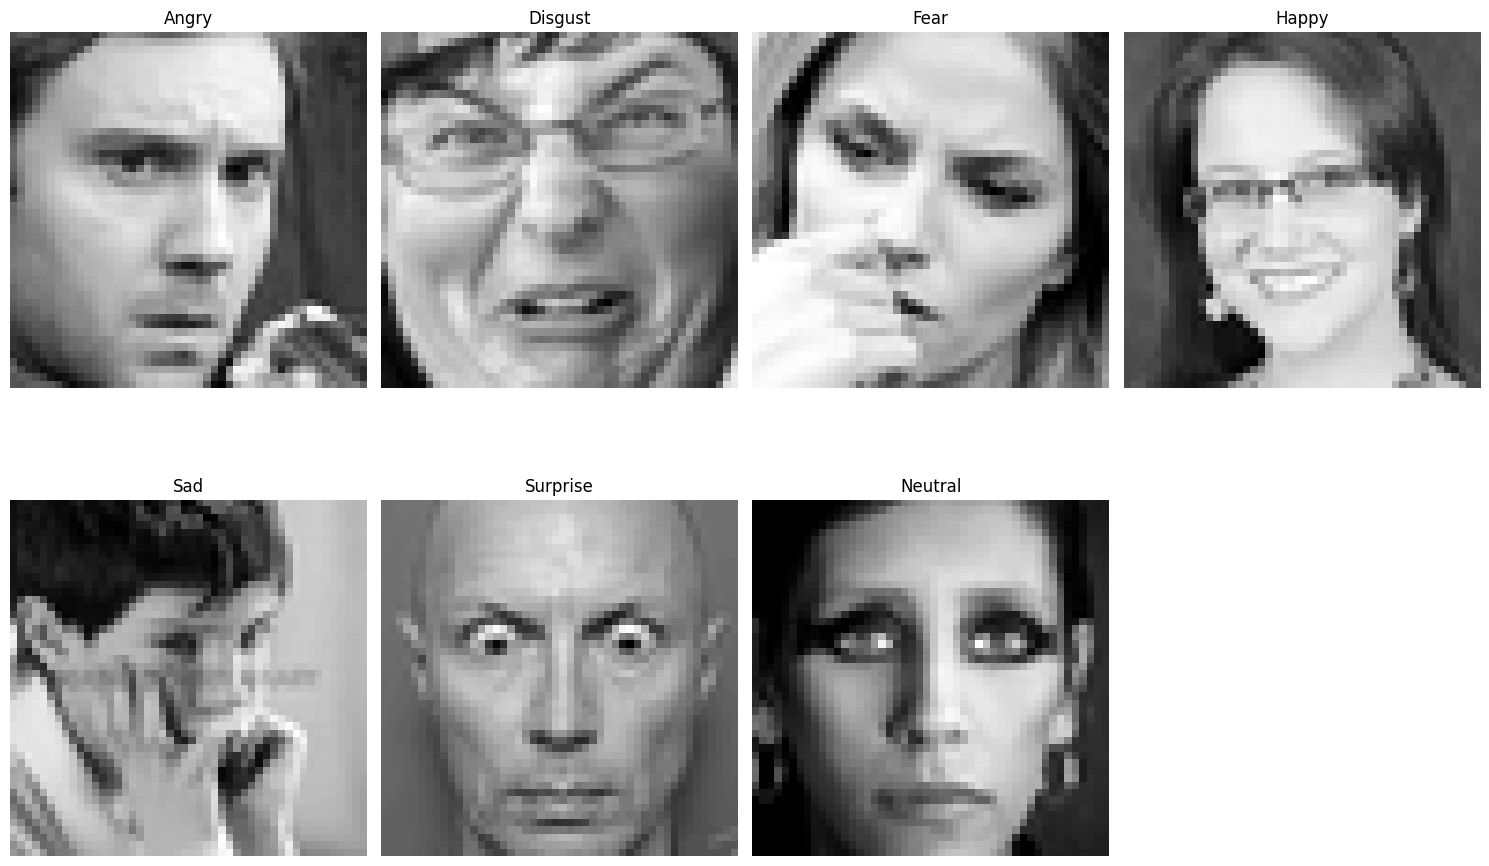

In [40]:
# Display sample images for each emotion
plt.figure(figsize=(15, 10))
for emotion, emotion_name in emotion_mapping.items():
    sample_image = data[data['emotion'] == emotion].iloc[0]["pixels"]  # Get first image of the emotion
    plt.subplot(2, 4, emotion + 1)  # Arrange in a 2x4 grid
    plt.imshow(sample_image.reshape(48, 48), cmap="gray")
    plt.title(emotion_name)
    plt.axis("off")

plt.tight_layout()
plt.show()

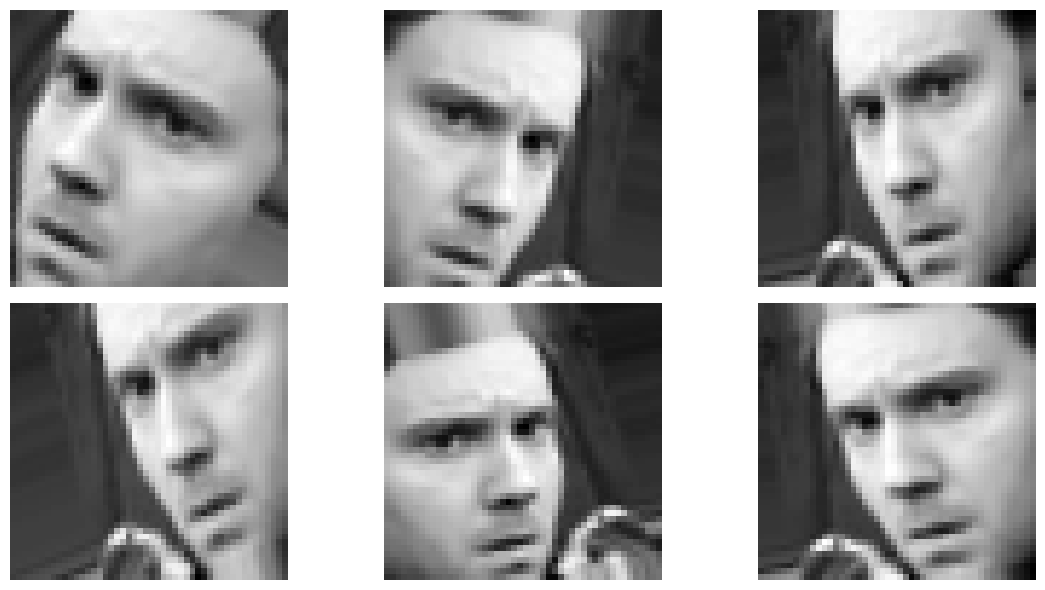

In [41]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Data augmentation example
datagen = ImageDataGenerator(
    rotation_range=30,  # Rotate the image by up to 30 degrees
    width_shift_range=0.2,  # Shift the image horizontally
    height_shift_range=0.2,  # Shift the image vertically
    zoom_range=0.2,  # Zoom in/out by up to 20%
    horizontal_flip=True  # Flip images horizontally
)

# Take a sample image
sample_image = X_train[0].reshape(1, 48, 48, 1)

# Generate augmented images
plt.figure(figsize=(12, 6))
for i, augmented_image in enumerate(datagen.flow(sample_image, batch_size=1)):
    if i == 6:  # Show 6 augmented images
        break
    plt.subplot(2, 3, i + 1)
    plt.imshow(augmented_image[0].reshape(48, 48), cmap="gray")
    plt.axis("off")

plt.tight_layout()
plt.show()

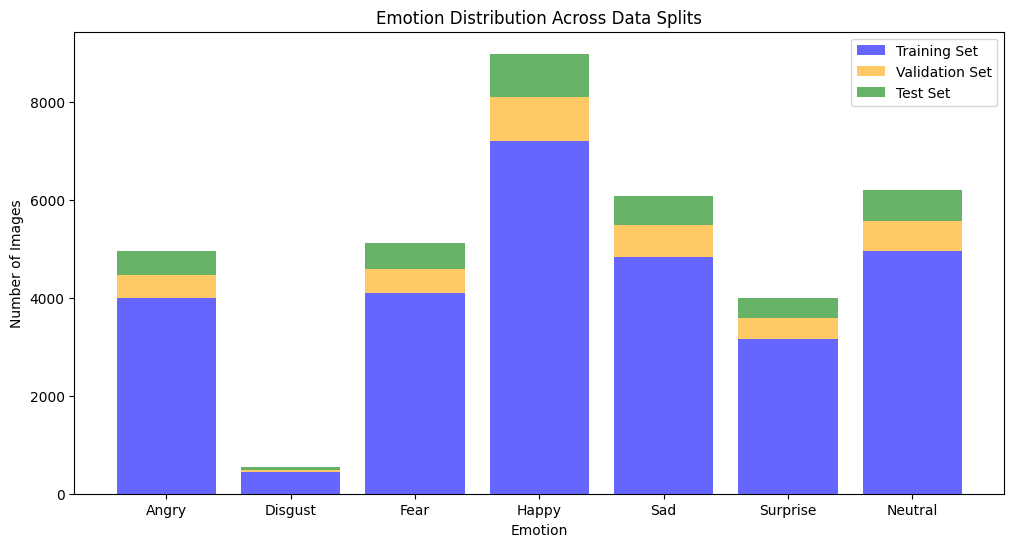

In [42]:
# Distribution of emotions per data split
train_counts = train_data['emotion'].value_counts().sort_index()
val_counts = val_data['emotion'].value_counts().sort_index()
test_counts = test_data['emotion'].value_counts().sort_index()

x = emotion_mapping.values()
plt.figure(figsize=(12, 6))
plt.bar(x, train_counts, color='blue', alpha=0.6, label="Training Set")
plt.bar(x, val_counts, color='orange', alpha=0.6, label="Validation Set", bottom=train_counts)
plt.bar(x, test_counts, color='green', alpha=0.6, label="Test Set", bottom=train_counts + val_counts)
plt.xlabel("Emotion")
plt.ylabel("Number of Images")
plt.title("Emotion Distribution Across Data Splits")
plt.legend()
plt.show()

Epoch 1/30
449/449 ━━━━━━━━━━━━━━━━━━━━ 82s 180ms/step - accuracy: 0.2643 - loss: 1.7924 - val_accuracy: 0.4037 - val_loss: 1.5521
Epoch 2/30
449/449 ━━━━━━━━━━━━━━━━━━━━ 81s 181ms/step - accuracy: 0.3836 - loss: 1.5785 - val_accuracy: 0.4564 - val_loss: 1.4390
Epoch 3/30
449/449 ━━━━━━━━━━━━━━━━━━━━ 82s 182ms/step - accuracy: 0.4227 - loss: 1.4750 - val_accuracy: 0.4700 - val_loss: 1.3979
Epoch 4/30
449/449 ━━━━━━━━━━━━━━━━━━━━ 80s 177ms/step - accuracy: 0.4455 - loss: 1.4322 - val_accuracy: 0.4759 - val_loss: 1.3713
Epoch 5/30
449/449 ━━━━━━━━━━━━━━━━━━━━ 83s 180ms/step - accuracy: 0.4575 - loss: 1.3937 - val_accuracy: 0.4893 - val_loss: 1.3564
Epoch 6/30
449/449 ━━━━━━━━━━━━━━━━━━━━ 81s 181ms/step - accuracy: 0.4800 - loss: 1.3574 - val_accuracy: 0.5029 - val_loss: 1.3162
Epoch 7/30
449/449 ━━━━━━━━━━━━━━━━━━━━ 82s 182ms/step - accuracy: 0.4884 - loss: 1.3294 - val_accuracy: 0.5026 - val_loss: 1.3065
Epoch 8/30
449/449 ━━━━━━━━━━━━━━━━━━━━ 81s 179ms/step - accuracy: 0.5065 - loss: 1

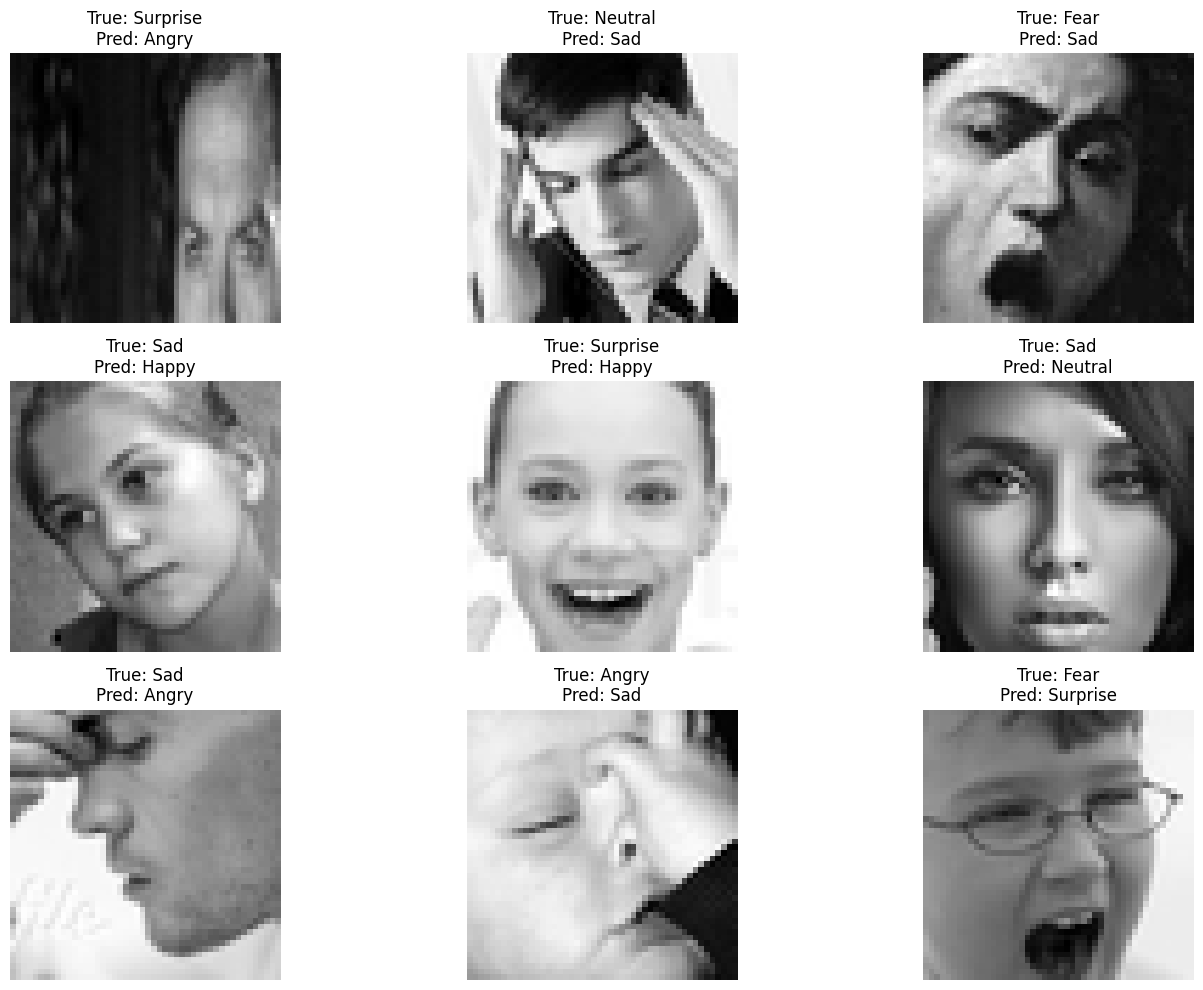

In [44]:
# Import necessary libraries
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# Define the CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(48, 48, 1)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(7, activation='softmax')  # 7 classes for emotions
])

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=30,  # Adjust the number of epochs as needed
    batch_size=64,  # Adjust the batch size as needed
    verbose=1
)

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

# Predict on the test set
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)  # Get predicted class labels
y_true = np.argmax(y_test, axis=1)  # Get true class labels

# Find indices of misclassified images
misclassified_indices = np.where(y_pred_classes != y_true)[0]

# Display some misclassified images
plt.figure(figsize=(15, 10))
for i, idx in enumerate(misclassified_indices[:9]):  # Show first 9 misclassified images
    plt.subplot(3, 3, i + 1)
    plt.imshow(X_test[idx].reshape(48, 48), cmap="gray")
    plt.title(f"True: {emotion_mapping[y_true[idx]]}\nPred: {emotion_mapping[y_pred_classes[idx]]}")
    plt.axis("off")

plt.tight_layout()
plt.show()

In [45]:
# Save the entire model to an HDF5 file
model.save("emotion_detection_model.h5")

In [46]:
# To load the model later
from tensorflow.keras.models import load_model
loaded_model = load_model("emotion_detection_model.h5")

In [47]:
# Confirm the model architecture and weights are intact
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)                    │ (None, 46, 46, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 23, 23, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 21, 21, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 10, 10, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 6400)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │         819,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 7)                   │             903 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,517,143 (9.60 MB)

 Trainable params: 839,047 (3.20 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 1,678,096 (6.40 MB)

Epoch 1/30
449/449 ━━━━━━━━━━━━━━━━━━━━ 81s 178ms/step - accuracy: 0.6715 - loss: 0.8040 - val_accuracy: 0.5425 - val_loss: 1.4462
Epoch 2/30
449/449 ━━━━━━━━━━━━━━━━━━━━ 80s 178ms/step - accuracy: 0.6798 - loss: 0.7814 - val_accuracy: 0.5414 - val_loss: 1.4911
Epoch 3/30
449/449 ━━━━━━━━━━━━━━━━━━━━ 83s 181ms/step - accuracy: 0.6845 - loss: 0.7681 - val_accuracy: 0.5372 - val_loss: 1.4901
Epoch 4/30
449/449 ━━━━━━━━━━━━━━━━━━━━ 82s 180ms/step - accuracy: 0.6886 - loss: 0.7586 - val_accuracy: 0.5411 - val_loss: 1.5527
Epoch 5/30
449/449 ━━━━━━━━━━━━━━━━━━━━ 81s 179ms/step - accuracy: 0.6949 - loss: 0.7332 - val_accuracy: 0.5422 - val_loss: 1.5771
Epoch 6/30
449/449 ━━━━━━━━━━━━━━━━━━━━ 82s 182ms/step - accuracy: 0.6967 - loss: 0.7299 - val_accuracy: 0.5414 - val_loss: 1.5729
Epoch 7/30
449/449 ━━━━━━━━━━━━━━━━━━━━ 81s 179ms/step - accuracy: 0.6944 - loss: 0.7364 - val_accuracy: 0.5375 - val_loss: 1.6163
Epoch 8/30
449/449 ━━━━━━━━━━━━━━━━━━━━ 85s 185ms/step - accuracy: 0.7068 - loss: 0

Test Accuracy: 52.35%


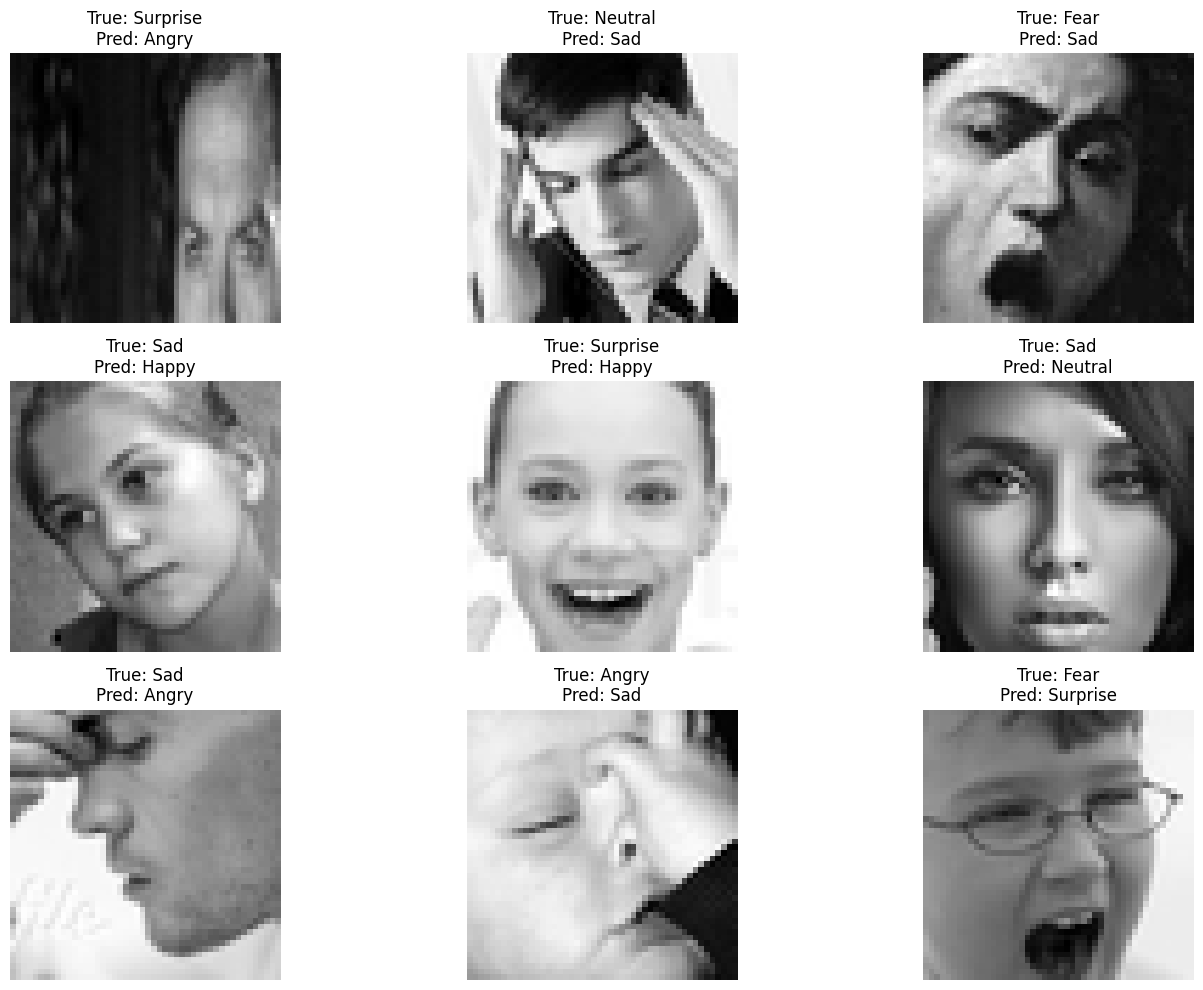

In [50]:
from tensorflow.keras.models import load_model

# Load the previously saved model
model = load_model("emotion_detection_model.h5")

model.compile(optimizer='adam',  # Or your original optimizer
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Continue training for 30 more epochs
history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=30,  # Additional epochs
    batch_size=64,
    verbose=1
)

# Evaluate the updated model
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

# Save the updated model
model.save("updated_emotion_detection_model.h5")

# Display some misclassified images
plt.figure(figsize=(15, 10))
for i, idx in enumerate(misclassified_indices[:9]):  # Show first 9 misclassified images
    plt.subplot(3, 3, i + 1)
    plt.imshow(X_test[idx].reshape(48, 48), cmap="gray")
    plt.title(f"True: {emotion_mapping[y_true[idx]]}\nPred: {emotion_mapping[y_pred_classes[idx]]}")
    plt.axis("off")

plt.tight_layout()
plt.show()

In [51]:
# Save the entire model to an HDF5 file
model.save("update_emotion_detection_model.h5")

Epoch 1/30
449/449 ━━━━━━━━━━━━━━━━━━━━ 86s 186ms/step - accuracy: 0.7506 - loss: 0.5844 - val_accuracy: 0.5300 - val_loss: 2.2072
Epoch 2/30
449/449 ━━━━━━━━━━━━━━━━━━━━ 138s 177ms/step - accuracy: 0.7664 - loss: 0.5454 - val_accuracy: 0.5358 - val_loss: 2.2864
Epoch 3/30
449/449 ━━━━━━━━━━━━━━━━━━━━ 80s 179ms/step - accuracy: 0.7533 - loss: 0.5723 - val_accuracy: 0.5313 - val_loss: 2.3362
Epoch 4/30
449/449 ━━━━━━━━━━━━━━━━━━━━ 82s 183ms/step - accuracy: 0.7597 - loss: 0.5535 - val_accuracy: 0.5302 - val_loss: 2.2620
Epoch 5/30
449/449 ━━━━━━━━━━━━━━━━━━━━ 139s 178ms/step - accuracy: 0.7613 - loss: 0.5498 - val_accuracy: 0.5330 - val_loss: 2.3613
Epoch 6/30
449/449 ━━━━━━━━━━━━━━━━━━━━ 85s 190ms/step - accuracy: 0.7594 - loss: 0.5554 - val_accuracy: 0.5344 - val_loss: 2.3579
Epoch 7/30
449/449 ━━━━━━━━━━━━━━━━━━━━ 136s 178ms/step - accuracy: 0.7651 - loss: 0.5431 - val_accuracy: 0.5383 - val_loss: 2.3651
Epoch 8/30
449/449 ━━━━━━━━━━━━━━━━━━━━ 80s 178ms/step - accuracy: 0.7722 - loss

Test Accuracy: 52.13%


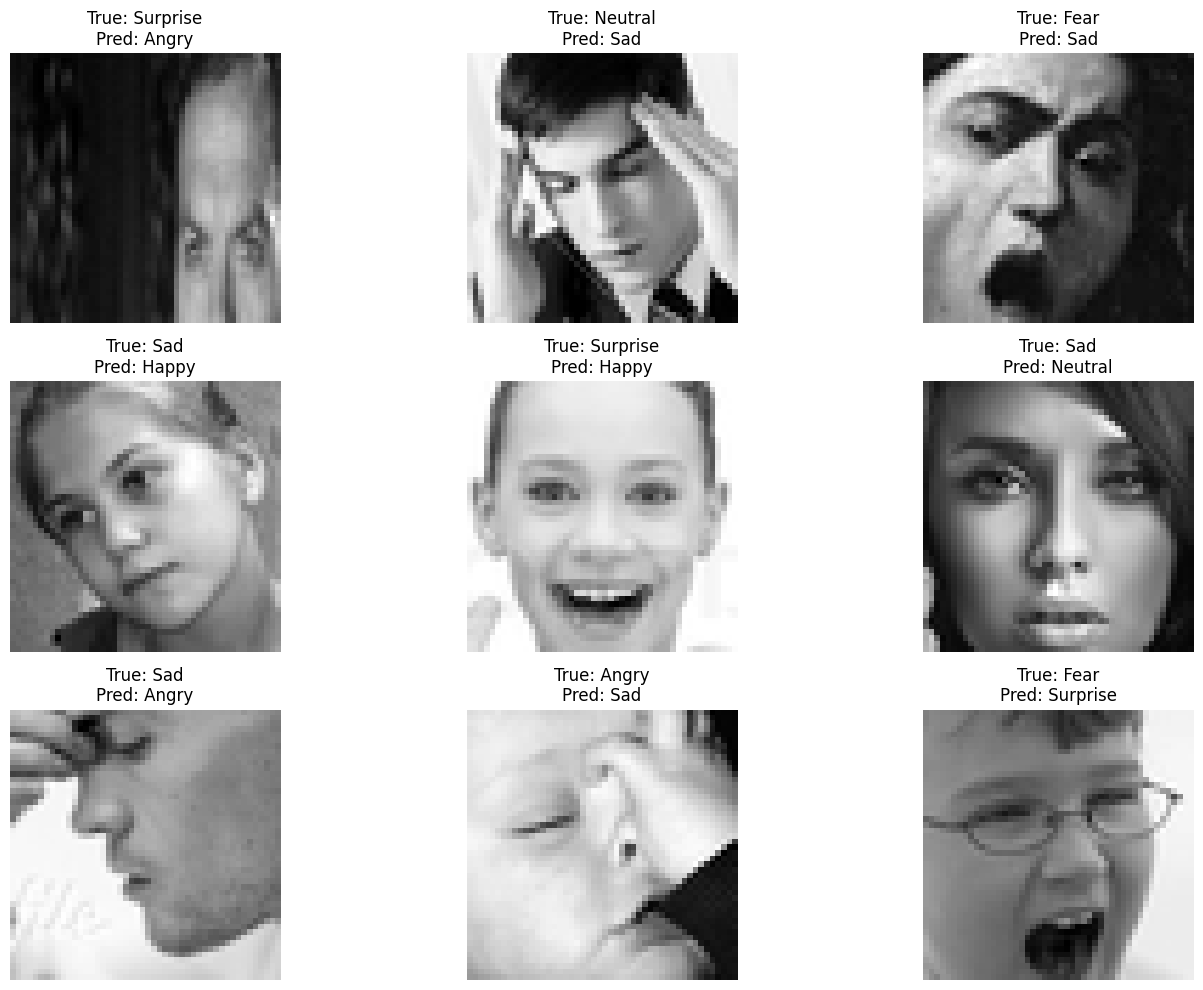

In [53]:
from tensorflow.keras.models import load_model

# Load the previously saved model
model = load_model("update_emotion_detection_model.h5")

model.compile(optimizer='adam',  # Or your original optimizer
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Continue training for 30 more epochs
history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=30,  # Additional epochs
    batch_size=64,
    verbose=1
)

# Evaluate the updated model
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

# Save the updated model
model.save("update2_emotion_detection_model.h5")

# Display some misclassified images
plt.figure(figsize=(15, 10))
for i, idx in enumerate(misclassified_indices[:9]):  # Show first 9 misclassified images
    plt.subplot(3, 3, i + 1)
    plt.imshow(X_test[idx].reshape(48, 48), cmap="gray")
    plt.title(f"True: {emotion_mapping[y_true[idx]]}\nPred: {emotion_mapping[y_pred_classes[idx]]}")
    plt.axis("off")

plt.tight_layout()
plt.show()

Epoch 1/30
225/225 ━━━━━━━━━━━━━━━━━━━━ 82s 358ms/step - accuracy: 0.7901 - loss: 0.4798 - val_accuracy: 0.5364 - val_loss: 3.0391
Epoch 2/30
225/225 ━━━━━━━━━━━━━━━━━━━━ 83s 369ms/step - accuracy: 0.7988 - loss: 0.4514 - val_accuracy: 0.5350 - val_loss: 3.0782
Epoch 3/30
225/225 ━━━━━━━━━━━━━━━━━━━━ 139s 355ms/step - accuracy: 0.8056 - loss: 0.4344 - val_accuracy: 0.5330 - val_loss: 3.0200
Epoch 4/30
225/225 ━━━━━━━━━━━━━━━━━━━━ 85s 368ms/step - accuracy: 0.8060 - loss: 0.4415 - val_accuracy: 0.5333 - val_loss: 3.0954
Epoch 5/30
225/225 ━━━━━━━━━━━━━━━━━━━━ 139s 356ms/step - accuracy: 0.8079 - loss: 0.4303 - val_accuracy: 0.5316 - val_loss: 3.0596
Epoch 6/30
225/225 ━━━━━━━━━━━━━━━━━━━━ 83s 362ms/step - accuracy: 0.8115 - loss: 0.4233 - val_accuracy: 0.5361 - val_loss: 3.1430
Epoch 7/30
225/225 ━━━━━━━━━━━━━━━━━━━━ 80s 356ms/step - accuracy: 0.8108 - loss: 0.4254 - val_accuracy: 0.5347 - val_loss: 3.2141
Epoch 8/30
225/225 ━━━━━━━━━━━━━━━━━━━━ 80s 354ms/step - accuracy: 0.8149 - loss:

Test Accuracy: 52.44%


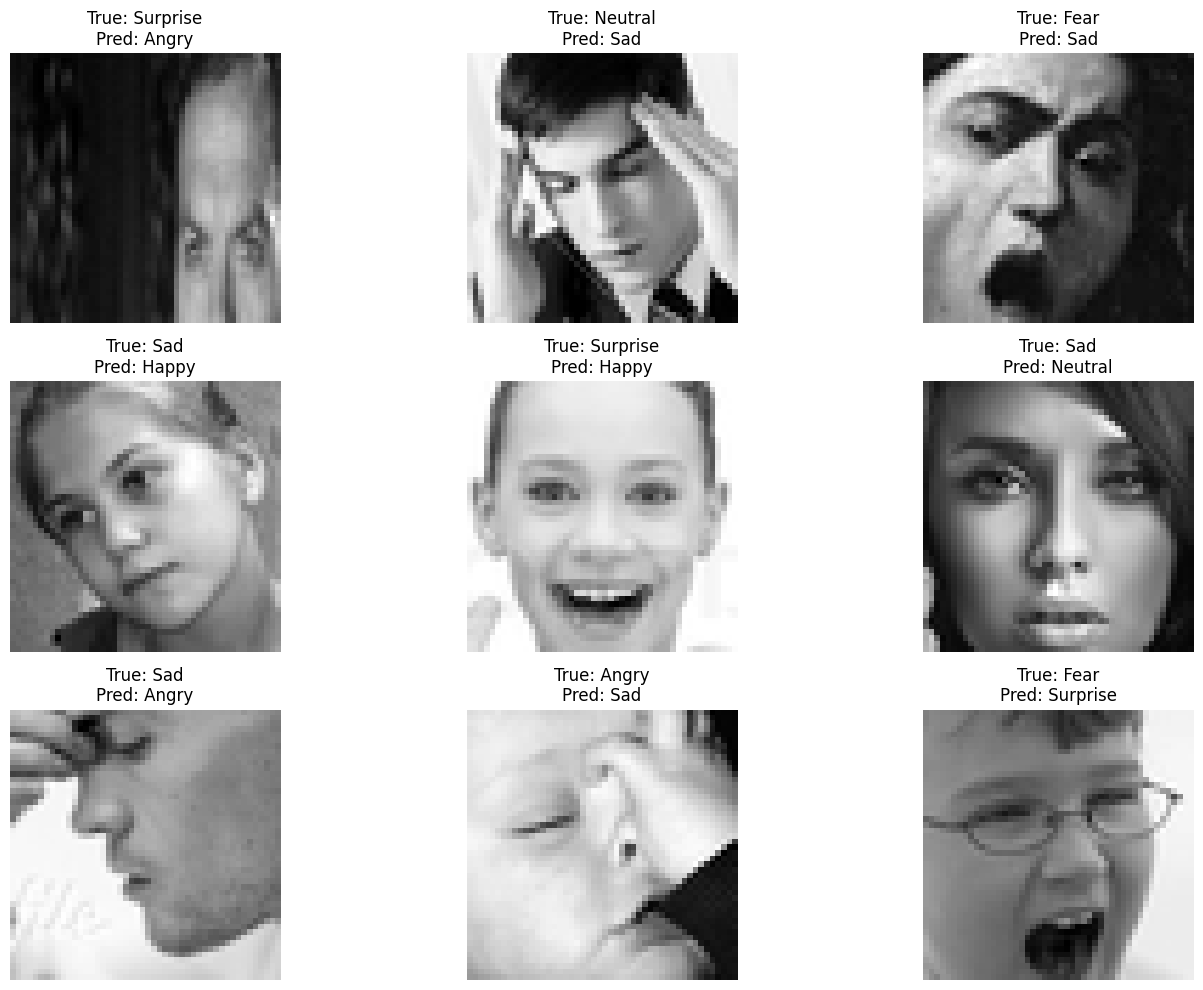

In [56]:
from tensorflow.keras.models import load_model

# Load the previously saved model
model = load_model("update2_emotion_detection_model.h5")

model.compile(optimizer='adam',  # Or your original optimizer
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Continue training for 30 more epochs
history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=30,  # Additional epochs
    batch_size=128,
    verbose=1
)

# Evaluate the updated model
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

# Save the updated model
model.save("update3_emotion_detection_model.h5")

# Display some misclassified images
plt.figure(figsize=(15, 10))
for i, idx in enumerate(misclassified_indices[:9]):  # Show first 9 misclassified images
    plt.subplot(3, 3, i + 1)
    plt.imshow(X_test[idx].reshape(48, 48), cmap="gray")
    plt.title(f"True: {emotion_mapping[y_true[idx]]}\nPred: {emotion_mapping[y_pred_classes[idx]]}")
    plt.axis("off")

plt.tight_layout()
plt.show()

Epoch 1/50
225/225 ━━━━━━━━━━━━━━━━━━━━ 85s 373ms/step - accuracy: 0.8169 - loss: 0.4023 - val_accuracy: 0.5375 - val_loss: 3.7983
Epoch 2/50
225/225 ━━━━━━━━━━━━━━━━━━━━ 138s 357ms/step - accuracy: 0.8192 - loss: 0.4025 - val_accuracy: 0.5364 - val_loss: 3.9330
Epoch 3/50
225/225 ━━━━━━━━━━━━━━━━━━━━ 80s 355ms/step - accuracy: 0.8237 - loss: 0.3819 - val_accuracy: 0.5389 - val_loss: 3.9169
Epoch 4/50
225/225 ━━━━━━━━━━━━━━━━━━━━ 83s 360ms/step - accuracy: 0.8196 - loss: 0.4036 - val_accuracy: 0.5358 - val_loss: 3.7078
Epoch 5/50
225/225 ━━━━━━━━━━━━━━━━━━━━ 81s 355ms/step - accuracy: 0.8191 - loss: 0.3976 - val_accuracy: 0.5305 - val_loss: 3.7872
Epoch 6/50
225/225 ━━━━━━━━━━━━━━━━━━━━ 80s 358ms/step - accuracy: 0.8229 - loss: 0.3908 - val_accuracy: 0.5327 - val_loss: 3.7651
Epoch 7/50
225/225 ━━━━━━━━━━━━━━━━━━━━ 82s 357ms/step - accuracy: 0.8229 - loss: 0.3922 - val_accuracy: 0.5369 - val_loss: 3.9715
Epoch 8/50
225/225 ━━━━━━━━━━━━━━━━━━━━ 80s 358ms/step - accuracy: 0.8219 - loss: 

Test Accuracy: 51.41%


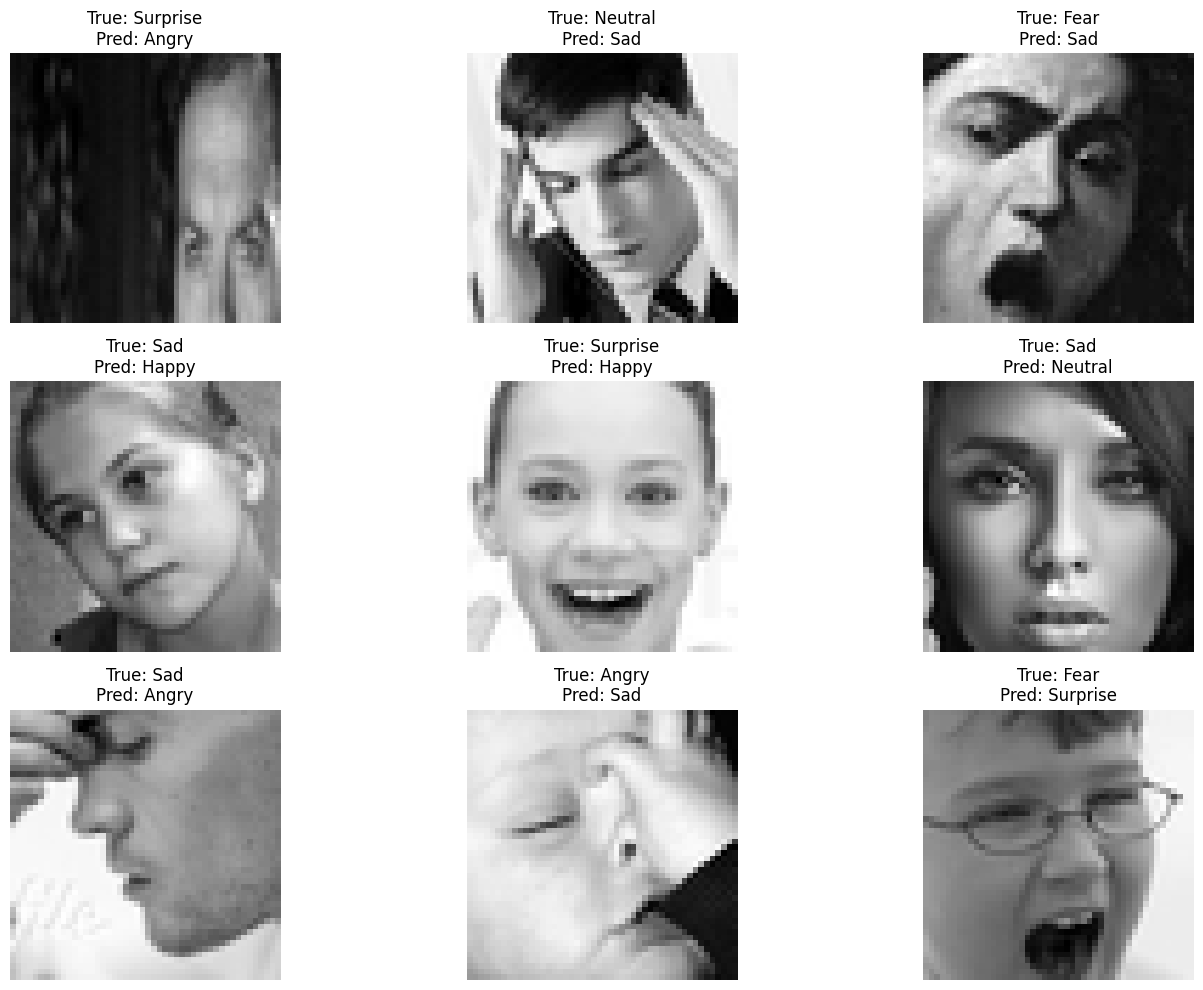

In [60]:
from tensorflow.keras.models import load_model

# Load the previously saved model
model = load_model("update3_emotion_detection_model.h5")

model.compile(optimizer='adam',  # Or your original optimizer
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Continue training for 50 more epochs
history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=50,  # Additional epochs
    batch_size=128,
    verbose=1
)

# Evaluate the updated model
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

# Save the updated model
model.save("update4_emotion_detection_model.h5")

# Display some misclassified images
plt.figure(figsize=(15, 10))
for i, idx in enumerate(misclassified_indices[:9]):  # Show first 9 misclassified images
    plt.subplot(3, 3, i + 1)
    plt.imshow(X_test[idx].reshape(48, 48), cmap="gray")
    plt.title(f"True: {emotion_mapping[y_true[idx]]}\nPred: {emotion_mapping[y_pred_classes[idx]]}")
    plt.axis("off")

plt.tight_layout()
plt.show()

Epoch 1/50
225/225 ━━━━━━━━━━━━━━━━━━━━ 83s 363ms/step - accuracy: 0.8331 - loss: 0.3631 - val_accuracy: 0.5300 - val_loss: 4.7941
Epoch 2/50
225/225 ━━━━━━━━━━━━━━━━━━━━ 79s 349ms/step - accuracy: 0.8331 - loss: 0.3600 - val_accuracy: 0.5311 - val_loss: 4.6237
Epoch 3/50
225/225 ━━━━━━━━━━━━━━━━━━━━ 83s 355ms/step - accuracy: 0.8350 - loss: 0.3662 - val_accuracy: 0.5308 - val_loss: 4.8241
Epoch 4/50
225/225 ━━━━━━━━━━━━━━━━━━━━ 84s 365ms/step - accuracy: 0.8446 - loss: 0.3517 - val_accuracy: 0.5227 - val_loss: 4.7272
Epoch 5/50
225/225 ━━━━━━━━━━━━━━━━━━━━ 140s 359ms/step - accuracy: 0.8436 - loss: 0.3501 - val_accuracy: 0.5213 - val_loss: 4.6038
Epoch 6/50
225/225 ━━━━━━━━━━━━━━━━━━━━ 83s 365ms/step - accuracy: 0.8333 - loss: 0.3636 - val_accuracy: 0.5266 - val_loss: 4.7567
Epoch 7/50
225/225 ━━━━━━━━━━━━━━━━━━━━ 138s 347ms/step - accuracy: 0.8382 - loss: 0.3541 - val_accuracy: 0.5300 - val_loss: 4.8681
Epoch 8/50
225/225 ━━━━━━━━━━━━━━━━━━━━ 81s 362ms/step - accuracy: 0.8338 - loss:

Test Accuracy: 51.60%


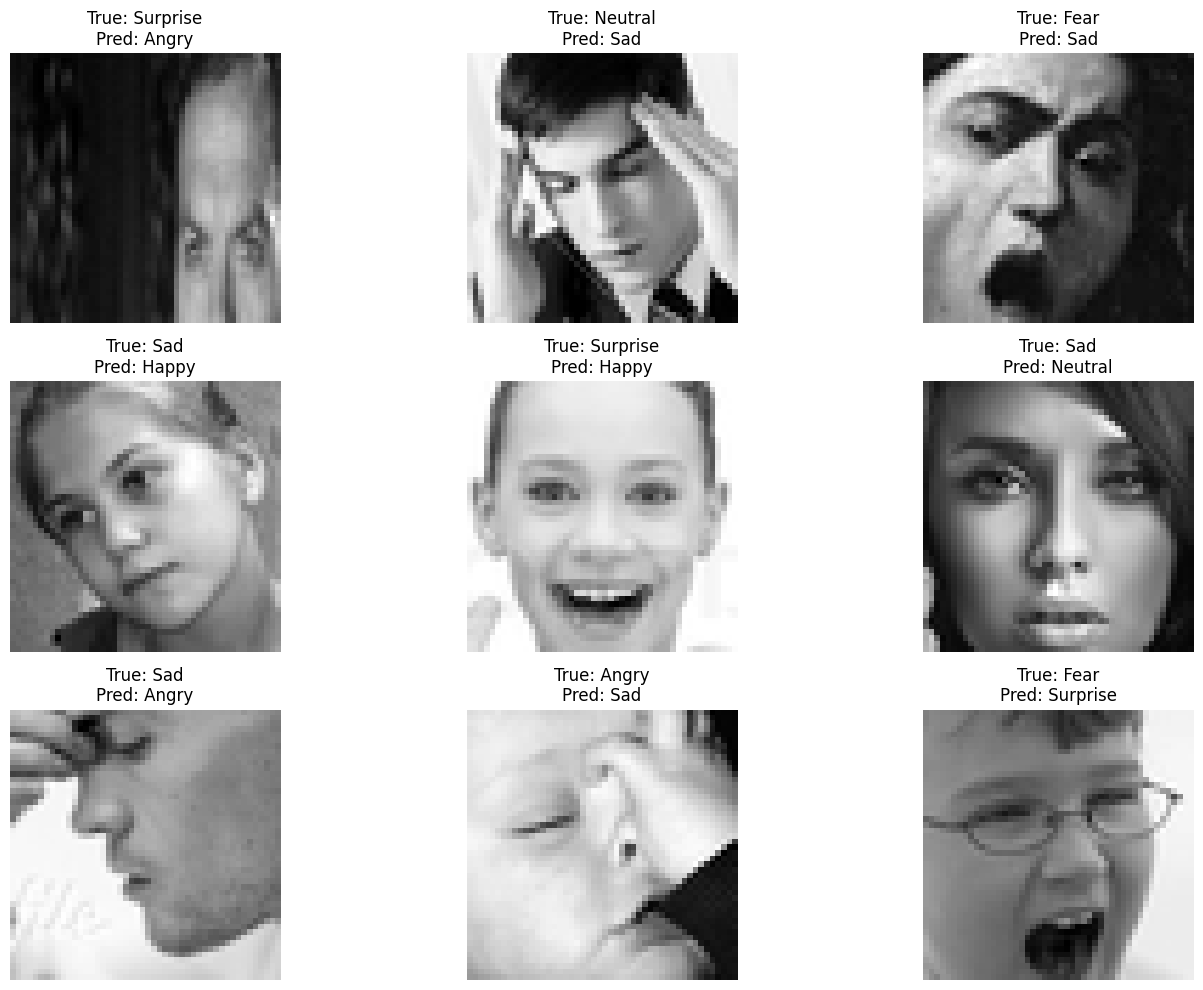

In [62]:
from tensorflow.keras.models import load_model

# Load the previously saved model
model = load_model("update4_emotion_detection_model.h5")

model.compile(optimizer='adam',  # Or your original optimizer
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Continue training for 50 more epochs
history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=50,  # Additional epochs
    batch_size=128,
    verbose=1
)

# Evaluate the updated model
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

# Save the updated model
model.save("update5_emotion_detection_model.h5")

# Display some misclassified images
plt.figure(figsize=(15, 10))
for i, idx in enumerate(misclassified_indices[:9]):  # Show first 9 misclassified images
    plt.subplot(3, 3, i + 1)
    plt.imshow(X_test[idx].reshape(48, 48), cmap="gray")
    plt.title(f"True: {emotion_mapping[y_true[idx]]}\nPred: {emotion_mapping[y_pred_classes[idx]]}")
    plt.axis("off")

plt.tight_layout()
plt.show()